<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-05-20 18:51:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.18’

m4_survey_data.sqli 100%[===================>]  34.98M  37.7MB/s    in 0.9s    

2022-05-20 18:51:43 (37.7 MB/s) - ‘m4_survey_data.sqlite.18’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:title={'center':'Distribution of Converted Compensation'}>

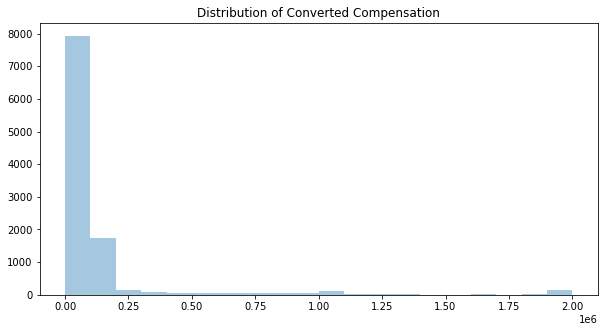

In [8]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

QUERY = '''SELECT ConvertedComp FROM master'''
df_ConvertedComp = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10,5))
plt.title('Distribution of Converted Compensation') 
sns.distplot(df_ConvertedComp,bins=20,kde=False)

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:title={'center':'Distribution of Age'}>

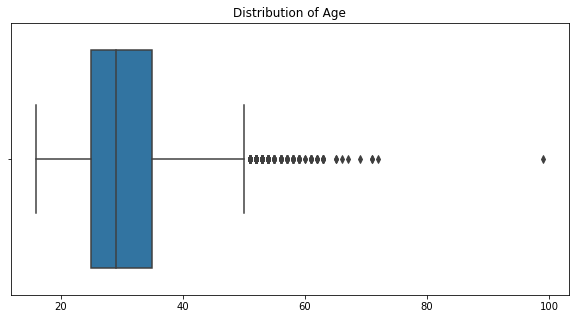

In [9]:
# your code goes here
QUERY = '''SELECT Age FROM master'''
df_Age = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10,5))
plt.title('Distribution of Age') 
sns.boxplot(df_Age)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:title={'center':'Relationship Between Age and Work Week Hours'}, xlabel='Age', ylabel='WorkWeekHrs'>

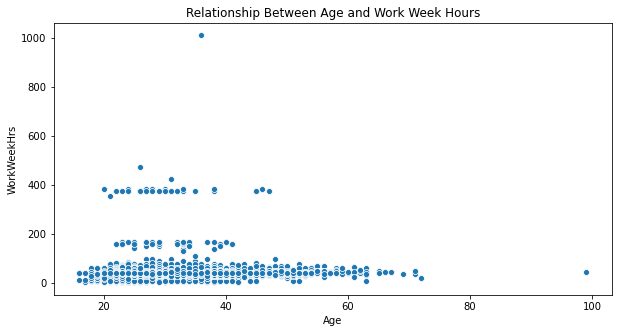

In [10]:
# your code goes here
QUERY = '''SELECT Age,WorkWeekHrs FROM master'''
df_Age_WorkWeekHrs = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10,5))
plt.title('Relationship Between Age and Work Week Hours') 
sns.scatterplot(x=df_Age_WorkWeekHrs['Age'],y=df_Age_WorkWeekHrs['WorkWeekHrs'])

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:title={'center':'Relationship Between Code Review Hours and Work Week Hours'}, xlabel='CodeRevHrs', ylabel='WorkWeekHrs'>

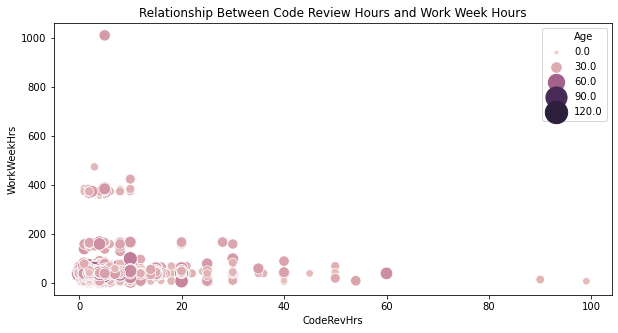

In [11]:
# your code goes here
QUERY = '''SELECT Age,WorkWeekHrs,CodeRevHrs FROM master'''
df_Age_WorkWeekHrs_CodeRevHrs = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10,5))
plt.title('Relationship Between Code Review Hours and Work Week Hours') 
sns.scatterplot(x=df_Age_WorkWeekHrs_CodeRevHrs['CodeRevHrs'],y=df_Age_WorkWeekHrs_CodeRevHrs['WorkWeekHrs'],hue=df_Age_WorkWeekHrs_CodeRevHrs['Age'],size=df_Age_WorkWeekHrs_CodeRevHrs['Age'],sizes=(10, 500))

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


Text(0.5, 1.0, 'Top 5 Databases Respondents Wish To Learn Next Year')

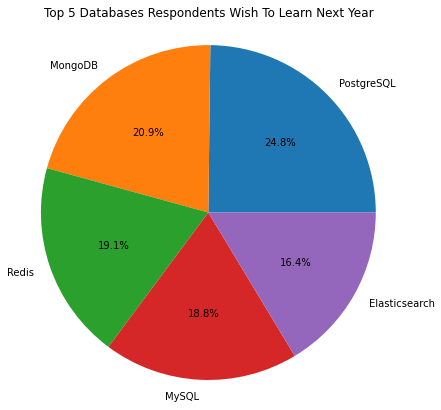

In [12]:
# your code goes here
QUERY = '''SELECT DatabaseDesireNextYear,COUNT(DatabaseDesireNextYear) as Count FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY COUNT(DatabaseDesireNextYear) DESC LIMIT 5'''
df_DatabaseDesireNextYear = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10,7))
plt.pie(df_DatabaseDesireNextYear['Count'],labels=df_DatabaseDesireNextYear['DatabaseDesireNextYear'],autopct='%1.1f%%',radius=1.1)
plt.title('Top 5 Databases Respondents Wish To Learn Next Year')

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:title={'center':'Median Code Review Hours and Work Week Hours for Ages 30-35'}, xlabel='Age'>

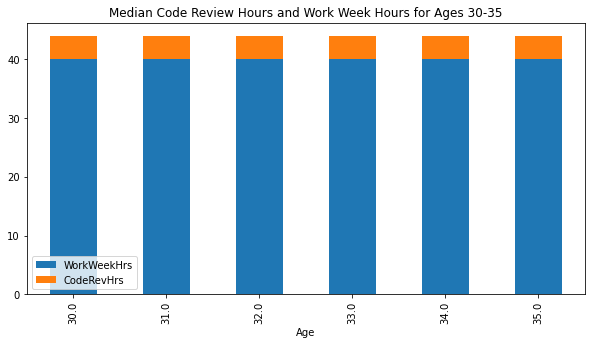

In [13]:
# your code goes here
QUERY = '''SELECT WorkWeekHrs,CodeRevHrs,Age FROM master WHERE Age >= 30 AND Age <=35'''
df_WorkWeekHrs_CodeRevHrs = pd.read_sql_query(QUERY,conn)
df_WorkWeekHrs_CodeRevHrs1 = df_WorkWeekHrs_CodeRevHrs.groupby('Age').median()
df_WorkWeekHrs_CodeRevHrs1.plot(kind='bar',stacked=True,figsize=(10,5),title='Median Code Review Hours and Work Week Hours for Ages 30-35')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:title={'center':'Converted Compensation for Ages 45-60'}, xlabel='Age'>

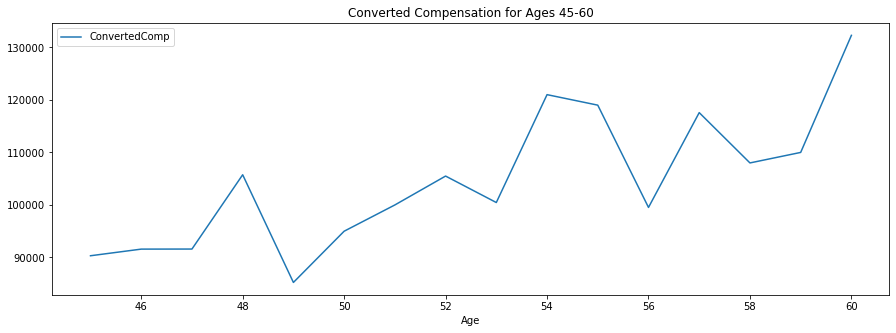

In [14]:
# your code goes here
QUERY = '''SELECT ConvertedComp,Age FROM master WHERE Age >= 45 AND Age <=60'''
df_ConvertedComp_Age = pd.read_sql_query(QUERY,conn)
df_ConvertedComp_Age1 = df_ConvertedComp_Age.groupby('Age').median()
plt.figure(figsize=(15,5))
plt.title('Converted Compensation for Ages 45-60') 
sns.lineplot(data=df_ConvertedComp_Age1)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:title={'center':'Main Branches'}>

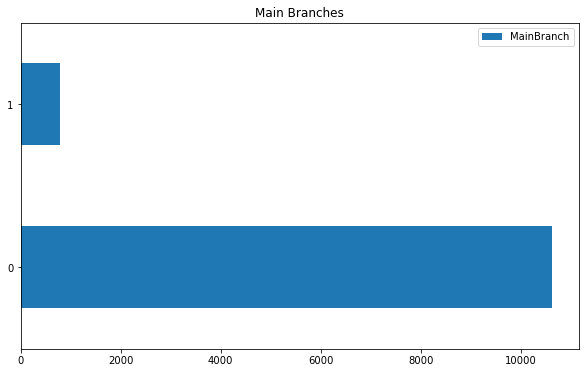

In [15]:
# your code goes here
QUERY = '''SELECT MainBranch,COUNT(*) AS MainBranch FROM master GROUP BY MainBranch'''
df_MainBranch=pd.read_sql_query(QUERY,conn)
df_MainBranch.plot(kind='barh',figsize=(10,5),title='Main Branches')

Close the database connection.


In [16]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
